<a href="https://colab.research.google.com/github/saadmarwan16/tensorflow_exercise/blob/main/balance_scale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pandas import read_csv
import matplotlib.pyplot as plt

In [2]:
def split_data(X, Y):
    return train_test_split(X, Y, test_size=0.33, random_state=1)

In [3]:
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)

    return y_train_enc, y_test_enc

In [4]:
df = read_csv('balance-scale.data')

In [5]:
dataset = df.values
X = dataset[:, 1:]
Y = dataset[:, 0]
X_train, X_test, y_train, y_test = split_data(X, Y)
N, D = X_train.shape
X_train.shape

(418, 4)

In [6]:
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [7]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_shape=(D, ), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

r = model.fit(X_train, y_train_enc, validation_data=(X_test, y_test_enc), epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 16ms/step - loss: 0.8790 - accuracy: 0.5933 - val_loss: 0.8285 - val_accuracy: 0.7476
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.7919 - val_loss: 0.6120 - val_accuracy: 0.8495
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4900 - accuracy: 0.8541 - val_loss: 0.4420 - val_accuracy: 0.8544
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8612 - val_loss: 0.3757 - val_accuracy: 0.8544
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3549 - accuracy: 0.8756 - val_loss: 0.3647 - val_accuracy: 0.8544
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3696 - accuracy: 0.8684 - val_loss: 0.3296 - val_accuracy: 0.8689
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3303 - accuracy: 0.8900 - val_loss: 0.3588 - val_accuracy: 0.8398
Epoch 8/100


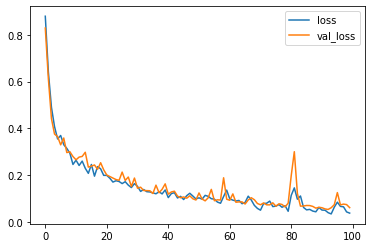

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

In [16]:
_, accuracy = model.evaluate(x=X_test, y=y_test_enc)
print('Accuracy: %.2f' % (accuracy*100) + '%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0614 - accuracy: 0.9854
Accuracy: 98.54%
